<a href="https://colab.research.google.com/github/morescode-pm/kaggle-speciesnet/blob/test-speciesnet-raw/run_speciesnet_on_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SpeciesNet Colab demo

This notebook:

* Installs the speciesnet package
* Downloads the model
* Copies it to a writeable folder before using it
* Downloads two test images from this repo
* Processes them using both the CLI (i.e., python -m speciesnet.scripts.run_model) and Python code

As is often the case when you !pip install a library on Colab, you will likely have to run the first code cell (which just does "!pip install speciesnet"), then re-start your Colab runtime, then you should be able to run the whole notebook.


## Imports


In [ ]:
!pip install speciesnet

In [ ]:
from IPython.display import display
from IPython.display import JSON

# from speciesnet import DEFAULT_MODEL
from speciesnet import draw_bboxes
from speciesnet import load_rgb_image
from speciesnet import SpeciesNet
from speciesnet import SUPPORTED_MODELS

In [ ]:
def print_predictions(predictions_dict: dict) -> None:
    print("Predictions:")
    for prediction in predictions_dict["predictions"]:
        print(prediction["filepath"], "=>", prediction["prediction"])

## Download model

In [ ]:
import kagglehub
import os
import shutil

# Choose the folder we're going to download to
model_path = '/content/models'
os.makedirs(model_path, exist_ok=True)

# Download the model (it will go to a folder like /kaggle/input/...)
download_path = kagglehub.model_download('google/speciesnet/PyTorch/v4.0.1a',
                                          force_download=True)

print('Model downloaded to temporary folder: {}'.format(download_path))

# List the contents of the downloaded directory to identify the actual files/subdirectories
model_files = os.listdir(download_path)

# Copy the contents of the model file to our destination folder
for item_name in model_files:
    source_path = os.path.join(download_path, item_name)
    destination_path = os.path.join(model_path, item_name)
    if os.path.isfile(source_path):
        shutil.copy2(source_path, destination_path)
    elif os.path.isdir(source_path):
        shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

print('{} files copied to: {}'.format(len(model_files),model_path))

Model downloaded to temporary folder: /kaggle/input/speciesnet/pytorch/v4.0.1a/1
6 files copied to: /content/models


## Download sample images

In [ ]:
os.makedirs('/content/images',exist_ok=True)
!wget "https://github.com/google/cameratrapai/blob/main/test_data/african_elephants.jpg?raw=true" -O "/content/images/african_elephants.jpg"
!wget "https://github.com/google/cameratrapai/blob/main/test_data/american_black_bear.jpg?raw=true" -O "/content/images/american_black_bear.jpg"

--2025-05-16 16:35:22--  https://github.com/google/cameratrapai/blob/main/test_data/african_elephants.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/google/cameratrapai/raw/refs/heads/main/test_data/african_elephants.jpg [following]
--2025-05-16 16:35:22--  https://github.com/google/cameratrapai/raw/refs/heads/main/test_data/african_elephants.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/cameratrapai/refs/heads/main/test_data/african_elephants.jpg [following]
--2025-05-16 16:35:23--  https://raw.githubusercontent.com/google/cameratrapai/refs/heads/main/test_data/african_elephants.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to ra

## Run the model using the CLI

In [ ]:
!python -m speciesnet.scripts.run_model --folders '/content/images' --model $model_path --predictions_json '/content/predictions-ensemble.json'

I0516 16:35:32.623872 132666812682240 utils.py:402] Loading partial predictions from `/content/predictions-ensemble.json`.
I0516 16:35:33.175282 132666812682240 classifier.py:99] Loaded SpeciesNetClassifier in 0.55 seconds on CPU.
I0516 16:35:34.565659 132666812682240 detector.py:99] Loaded SpeciesNetDetector in 1.39 seconds on CPU.
I0516 16:35:35.285546 132666812682240 ensemble.py:71] Loaded SpeciesNetEnsemble in 0.72 seconds.
I0516 16:35:35.286440 132666812682240 utils.py:402] Loading partial predictions from `/content/predictions-ensemble.json`.
Detector preprocess   : 0it [00:00, ?it/s]
Detector predict      : 0it [00:00, ?it/s]

Classifier preprocess : 0it [00:00, ?it/s]


Classifier predict    : 0it [00:00, ?it/s]



Detector preprocess   : 0it [00:00, ?it/s]
Detector predict      : 0it [00:00, ?it/s]
Classifier preprocess : 0it [00:00, ?it/s]
Classifier predict    : 0it [00:00, ?it/s]
Geolocation           : 0it [00:00, ?it/s]
I0516 16:35:35.316800 132666812682240 utils.py:448] 

In [ ]:
# print the contents of the output json
import json
with open('/content/predictions-ensemble.json','r') as f:
  d = json.load(f)
print(str(d))


{'predictions': [{'filepath': '/content/images/african_elephants.jpg', 'classifications': {'classes': ['55631055-3e0e-4b7a-9612-dedebe9f78b0;mammalia;proboscidea;elephantidae;loxodonta;africana;african elephant', "dc5dbe17-a8ca-40a6-ac6a-3b6b1d63e6d6;mammalia;cetartiodactyla;bovidae;eudorcas;thomsonii;thomson's gazelle", "8c48ed75-e275-4188-a6b1-55929d298e85;mammalia;cetartiodactyla;bovidae;nanger;granti;grant's gazelle", '9732cefb-6a08-49f6-b61e-b9a9054368c4;mammalia;cetartiodactyla;bovidae;syncerus;caffer;african buffalo', 'ccd7d6d7-8eb2-4fdb-a6d6-f1970847e449;mammalia;cetartiodactyla;suidae;phacochoerus;africanus;common warthog'], 'scores': [0.9922673106193542, 0.0009154624422080815, 0.0008422238752245903, 0.0005632593529298902, 0.000399921991629526]}, 'detections': [{'category': '1', 'label': 'animal', 'conf': 0.9352574348449707, 'bbox': [0.7041015625, 0.4765625, 0.11083984375, 0.125]}, {'category': '1', 'label': 'animal', 'conf': 0.9123576879501343, 'bbox': [0.564453125, 0.4218750

## Run the model using Python code

In [ ]:
model = SpeciesNet(model_path)

In [ ]:
predictions_dict = model.predict(
    instances_dict={
        "instances": [
            {
                "filepath": "/content/images/african_elephants.jpg",
                "latitude": -1.0,
                "longitude": 35.0,
            },
            {
                "filepath": "/content/images/american_black_bear.jpg",
                "country": "USA",
            },
        ]
    }
)

print_predictions(predictions_dict)
display(JSON(predictions_dict))

Predictions:
/content/images/african_elephants.jpg => 55631055-3e0e-4b7a-9612-dedebe9f78b0;mammalia;proboscidea;elephantidae;loxodonta;africana;african elephant
/content/images/american_black_bear.jpg => 436ddfdd-bc43-44c3-a25d-34671d3430a0;mammalia;carnivora;ursidae;ursus;americanus;american black bear


<IPython.core.display.JSON object>

## Display detections

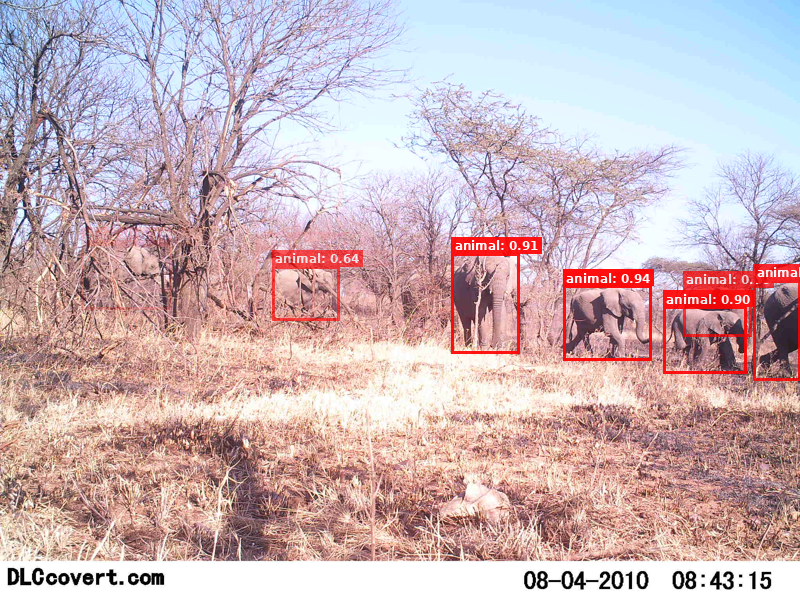

In [ ]:
first_prediction_item = predictions_dict["predictions"][0]
img = load_rgb_image(first_prediction_item["filepath"])
detections = first_prediction_item["detections"]
img.thumbnail(size=(800, 800))
draw_bboxes(img, detections)